In [1]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

<Axes: >

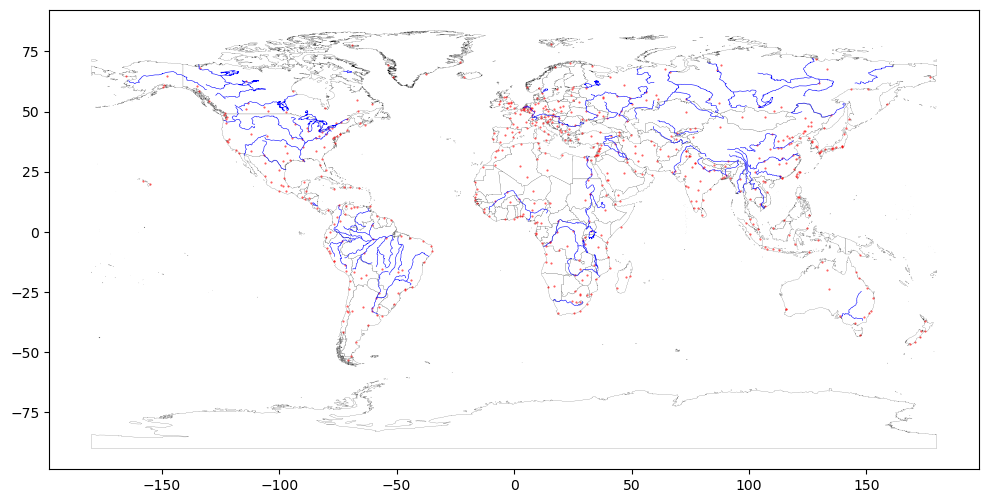

In [2]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...

In [3]:
# ONE file - SEVERAL layers
import os

countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")

Exercise 1

In [4]:
india=countries[countries.COUNTRY=='India']

In [5]:
# is this CRS projected?
india.crs.is_projected

False

In [6]:
# recommended for India (meters)
india.to_crs(7755).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [7]:
# now this works with no warning
india.to_crs(7755).centroid

104    POINT (3955049.307 3862608.372)
dtype: geometry

<Axes: >

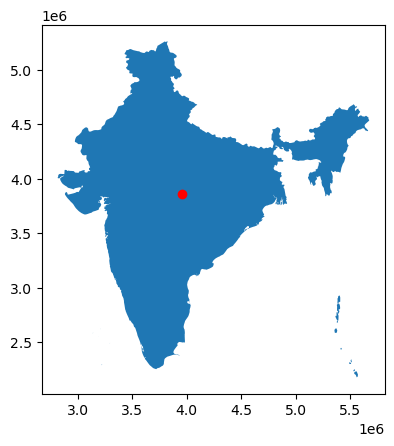

In [8]:
# replotting:

base7755=india.to_crs(7755).plot()
india.to_crs(7755).centroid.plot(color='red',ax=base7755)

In [9]:
cities_india_7755=cities[cities.COUNTRY=='India'].to_crs(7755)

In [10]:
riversIndia_clipped=gpd.clip(rivers,india)

In [11]:
india_7755=india.to_crs(7755)

rivers_india_7755=riversIndia_clipped.to_crs(india_7755.crs)

In [12]:
## saving

import os

india_7755.to_file(os.path.join("maps","indiaMaps_7755.gpkg"), layer='country', driver="GPKG")
cities_india_7755.to_file(os.path.join("maps","indiaMaps_7755.gpkg"), layer='cities', driver="GPKG")
rivers_india_7755.to_file(os.path.join("maps","indiaMaps_7755.gpkg"), layer='rivers', driver="GPKG")

india_7755.centroid.to_file(os.path.join("maps","indiaMaps_7755.gpkg"), layer='centroid', driver="GPKG")

Exercise 2

In [13]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,NaN,NaN,K00A,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,NaN,NaN,00AA,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,NaN,NaN,00AK,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,NaN,NaN,00AL,00AL,NaN,NaN,NaN
83094,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,NaN,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad
83095,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83096,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,NaN,US,US-TX,Blum,no,NaN,NaN,87TX,87TX,NaN,NaN,NaN
83097,313629,ZZZZ,small_airport,Satsuma Iōjima Airport,30.784722,130.270556,338.0,AS,JP,JP-46,Mishima,no,NaN,NaN,RJX7,RJX7,NaN,http://wikimapia.org/6705190/Satsuma-Iwo-jima-...,"SATSUMA,IWOJIMA,RJX7"


In [14]:
# bye first row
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
0,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,NaN,NaN,00AA,00AA,NaN,NaN,NaN
1,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,NaN,NaN,00AK,00AK,NaN,NaN,NaN
2,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,NaN,NaN,00AL,00AL,NaN,NaN,NaN
3,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,NaN,NaN,00AN,00AN,NaN,NaN,NaN
4,322127,00AS,small_airport,Fulton Airport,34.942803,-97.818019,1100.0,NaN,US,US-OK,Alex,no,NaN,NaN,00AS,00AS,NaN,NaN,NaN


In [15]:
# keep only rows where country is 'India'
infoairports = infoairports[infoairports['iso_country'] == 'IN']

In [16]:
# keep the columns needed

infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'icao_code', 'iata_code',
       'gps_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

In [17]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 30521 to 78927
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           639 non-null    object 
 1   type           639 non-null    object 
 2   latitude_deg   639 non-null    float64
 3   longitude_deg  639 non-null    float64
 4   elevation_ft   393 non-null    float64
 5   municipality   569 non-null    object 
dtypes: float64(3), object(3)
memory usage: 34.9+ KB


In [18]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

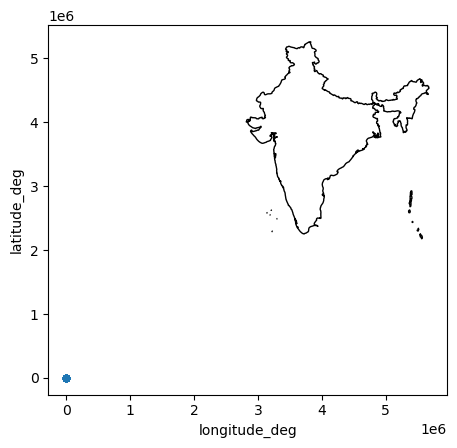

In [19]:
# let's plot

base = india_7755.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

<Axes: >

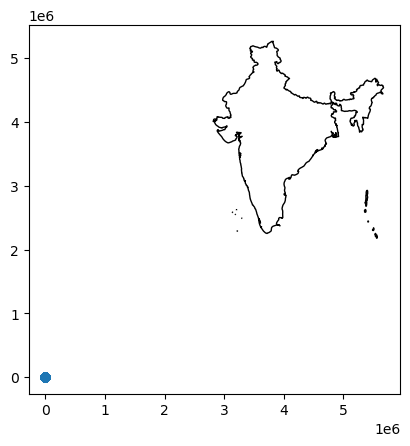

In [20]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=india.crs.to_epsg())# the coordinates were in degrees - unprojected

# let's plot

base = india_7755.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [21]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

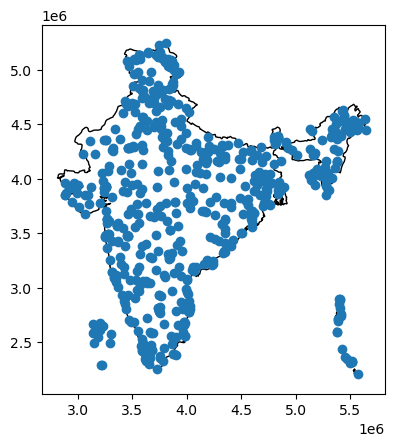

In [22]:
airports_7755=airports.to_crs(7755)

## then

base = india_7755.plot(color='white', edgecolor='black')
airports_7755.plot(ax=base)

In [23]:
airports_7755['type'].value_counts() # this will not work: airports.type.value_counts()

type
heliport          290
small_airport     183
medium_airport    122
closed             31
large_airport      12
seaplane_base       1
Name: count, dtype: int64

In [24]:
airports_7755.rename(columns={'type':'kind'},inplace=True)

## adding the airports to GPKG
airports_7755.to_file(os.path.join("maps","indiaMaps_7755.gpkg"), layer='airports', driver="GPKG")

Exercise 3

In [25]:
india_7755

,COUNTRY,geometry
104,India,"MULTIPOLYGON (((5225154.701 4022905.808, 52187..."


In [26]:
india_7755.boundary

104    MULTILINESTRING ((5225154.701 4022905.808, 521...
dtype: geometry

<Axes: >

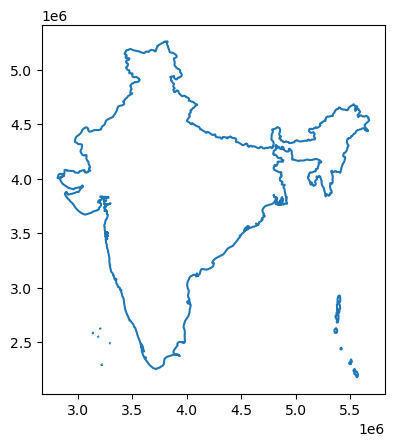

In [27]:
india_7755.boundary.plot()

In [28]:
type(india_7755.boundary)

geopandas.geoseries.GeoSeries

In [29]:
# converting into GDF
india_7755.boundary.to_frame()

,0
104,"MULTILINESTRING ((5225154.701 4022905.808, 521..."


In [30]:
india_7755.boundary.to_frame().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 104 to 104
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


In [31]:
# conversion
india_border=india_7755.boundary.to_frame()

# new column (optional)
india_border['name']='India'

# renaming the geometry column
india_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
india_border = india_border.set_geometry("geometry")

# verifying:
india_border.crs

<Projected CRS: EPSG:7755>
Name: WGS 84 / India NSF LCC
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: India - onshore and offshore. Includes Amandivis, Laccadives, Minicoy, Andaman Islands, Nicobar Islands, and Sikkim.
- bounds: (65.6, 3.87, 97.42, 35.51)
Coordinate Operation:
- name: Survey of India Lambert
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
india_border

,geometry,name
104,"MULTILINESTRING ((5225154.701 4022905.808, 521...",India


Exercise 4

In [33]:
india_shp=gpd.read_file(os.path.join("India","IND_adm2.shp"))

In [34]:
india_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
type(india_shp)

geopandas.geodataframe.GeoDataFrame

In [37]:
india_shp = india_shp.to_crs(epsg=32643)

In [38]:
india_shp.geometry.head()

0    MULTIPOLYGON (((2484441.133 1072561.22, 248457...
1    MULTIPOLYGON (((2536990.771 1738827.541, 25370...
2    MULTIPOLYGON (((2582977.096 1437121.449, 25852...
3    POLYGON ((789049.335 1679600.779, 789459.229 1...
4    POLYGON ((875695.591 1543484.297, 876352.042 1...
Name: geometry, dtype: geometry

In [39]:
india_states.crs

NameError: name 'india_states' is not defined

In [37]:
india_states.crs = "EPSG:7755"

In [38]:
india_states=india_states.to_crs(7755)

In [39]:
india_states.to_file(os.path.join("maps","indiaMaps_7755.gpkg"), layer='states', driver="GPKG")

Exercise 5

In [40]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [41]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()
fragilityCia.head()

,Country,Officialstatename,InternetccTLD,iso2,iso3,fragility,co2,region,ForestRev_gdp
0,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,105.0,7893000.0,SOUTH ASIA,0.20
1,ALBANIA,The Republic of Albania,.al,AL,ALB,58.9,3794000.0,EUROPE,0.18
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA,75.4,151633000.0,AFRICA,0.10
3,ANGOLA,The Republic of Angola,.ao,AO,AGO,87.8,19362000.0,AFRICA,0.36
4,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG,54.4,729000.0,CENTRAL AMERICA AND THE CARIBBEAN,0.00


In [42]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [43]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

In [44]:
onlyFragilCia

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)',
 'VIET NAM'}

In [45]:
# and here
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAHAMAS',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ERITREA',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GAMBIA',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'HE

In [46]:
!pip install thefuzz

In [47]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('DOMINICAN REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('NORTHE

In [48]:
# keeping high scores

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('NORTHERN MARIANA ISLANDS (THE)', ('NORTHERN MARIANA ISLANDS (US)', 91)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZ

In [49]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)': 'NORTHERN MARIANA ISLANDS (US)',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'AMERICAN SAMOA (US)',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'U

In [50]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [51]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|SWA|KOR')]

,COUNTRY,geometry
17,BOTSWANA,"POLYGON ((26.40114 -24.63189, 26.38996 -24.627..."
120,NORTH KOREA,"POLYGON ((125.62979 38.65694, 125.51721 38.717..."
122,SOUTH KOREA,"MULTIPOLYGON (((126.86922 36.0606, 126.8591 36..."
126,LAOS,"POLYGON ((104.257 17.88763, 104.23943 17.93722..."
243,SWAZILAND,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."


In [52]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'SOUTH KOREA':'KOREA (THE REPUBLIC OF)'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [53]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

{'CABO VERDE': 'CAPE VERDE',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [54]:
# changing
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

In [55]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            170 non-null    object  
 1   geometry           170 non-null    geometry
 2   Officialstatename  170 non-null    object  
 3   InternetccTLD      170 non-null    object  
 4   iso2               169 non-null    object  
 5   iso3               170 non-null    object  
 6   fragility          170 non-null    float64 
 7   co2                170 non-null    float64 
 8   region             170 non-null    object  
 9   ForestRev_gdp      170 non-null    float64 
dtypes: float64(3), geometry(1), object(6)
memory usage: 13.4+ KB


In [56]:
DataNames=['co2', 'ForestRev_gdp']

In [57]:
pd.melt(theMapAndData[DataNames])

,variable,value
0,co2,7.290000e+05
1,co2,7.893000e+06
2,co2,1.516330e+08
3,co2,3.538900e+07
4,co2,3.794000e+06
...,...,...
335,ForestRev_gdp,4.450000e+00
336,ForestRev_gdp,1.610000e+00
337,ForestRev_gdp,2.650000e+00
338,ForestRev_gdp,3.900000e-01


In [58]:
!pip install seaborn

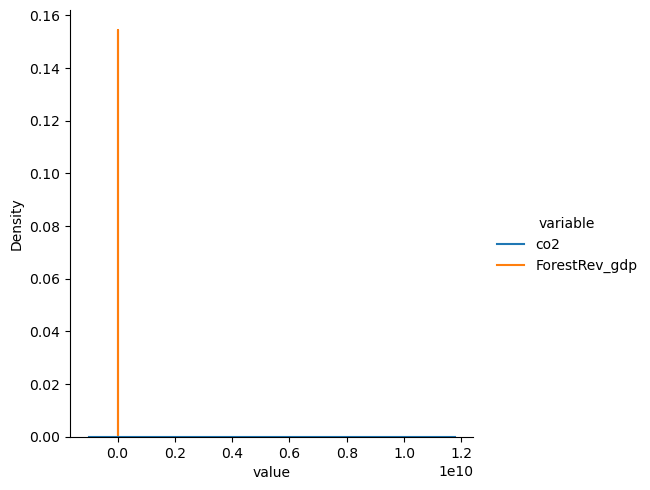

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [60]:
!pip install -U scikit-learn

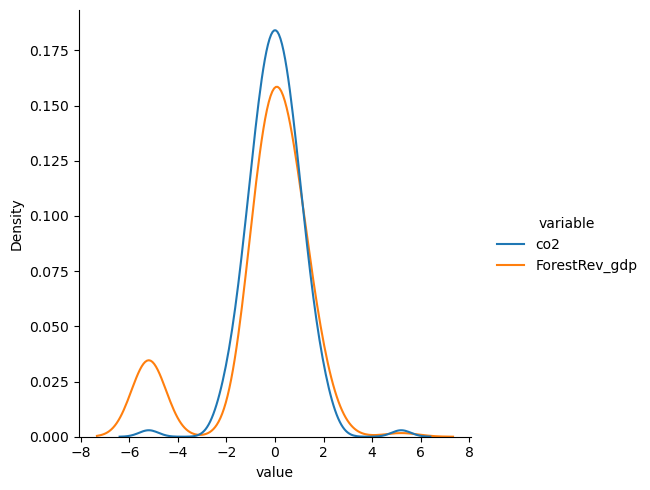

In [61]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [62]:
theMapAndData['co2_Qt']=QtScaled_data[:,0]

In [63]:
! pip show numba mapclassify numpy

Name: numba
Version: 0.61.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: C:\Users\mendo\anaconda3\envs\dataespacial__31111\Lib\site-packages
Requires: llvmlite, numpy
Required-by: 
---
Name: mapclassify
Version: 2.8.1
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: C:\Users\mendo\anaconda3\envs\dataespacial__31111\Lib\site-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: 
---
Name: numpy
Version: 2.1.3
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are
 met:

     * Redistributions of source code must retain the 

In [64]:
!pip install mapclassify

In [65]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.co2_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [66]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

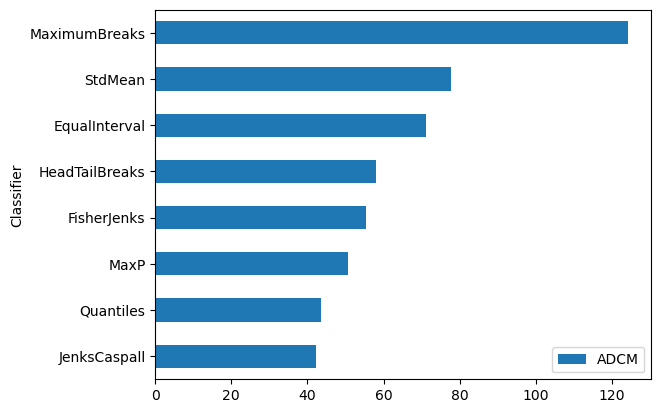

In [67]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [68]:
theMapAndData['co2_Qt_jc5'] = jc5.yb

In [69]:
# there you are
theMapAndData[['co2_Qt','co2_Qt_jc5']].head()

,co2_Qt,co2_Qt_jc5
0,-1.392136,0
1,-0.286256,2
2,0.901777,3
3,0.284856,2
4,-0.725128,1


In [70]:
indexList=['co2_Qt_jc5'] # add more?
aggregator={'co2_Qt': ['mean']}

pd.concat([theMapAndData[['co2_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,co2_Qt_jc5,co2_Qt
,,mean
0,0,-1.608993
1,1,-0.626060
2,2,-0.008105
3,3,0.625737
4,4,1.626888


In [71]:
# renaming
newLabelsForLevels={0:"0_Very_High", 1:"1_High", 2:"2_Medium", 3:"3_Low", 4:"4_Very_Low"}

theMapAndData['co2_Qt_jc5_cat']=theMapAndData.loc[:,'co2_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['co2_Qt','co2_Qt_jc5','co2_Qt_jc5_cat']].head(20)

,co2_Qt,co2_Qt_jc5,co2_Qt_jc5_cat
0,-1.392136,0,0_Very_High
1,-0.286256,2,2_Medium
2,0.901777,3,3_Low
3,0.284856,2,2_Medium
4,-0.725128,1,1_High
5,-0.493152,1,1_High
6,0.130552,2,2_Medium
7,-1.728745,0,0_Very_High
8,0.948860,3,3_Low
9,1.415035,4,4_Very_Low


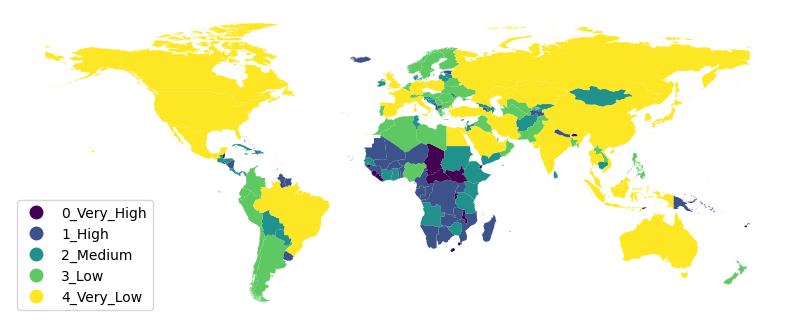

In [72]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='co2_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

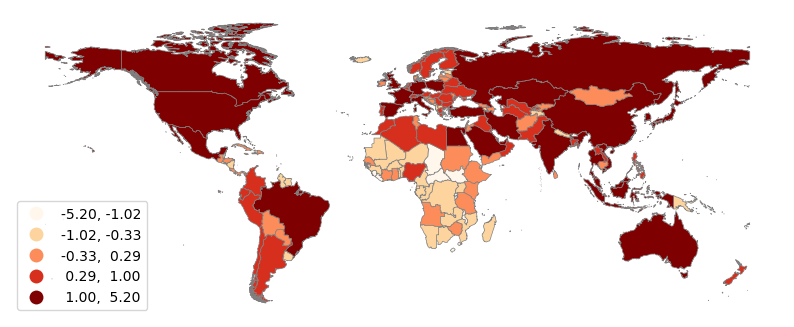

In [73]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='co2_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [74]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

In [75]:
theMapAndData['ForestRev_gdp_Qt']=QtScaled_data[:,1]

In [76]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.ForestRev_gdp_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [77]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

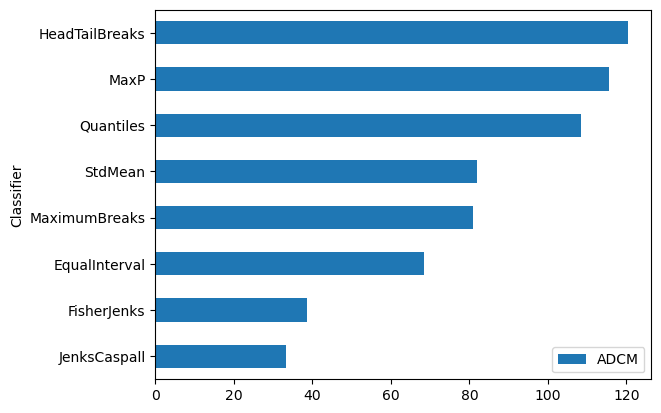

In [78]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [79]:
theMapAndData['ForestRev_gdp_Qt_jc5'] = jc5.yb

In [80]:
# there you are
theMapAndData[['ForestRev_gdp_Qt','ForestRev_gdp_Qt_jc5']].head()

,ForestRev_gdp_Qt,ForestRev_gdp_Qt_jc5
0,-5.199338,0
1,-0.076809,2
2,-0.338888,1
3,-0.791639,1
4,-0.102491,2


In [81]:
indexList=['ForestRev_gdp_Qt_jc5'] # add more?
aggregator={'ForestRev_gdp_Qt': ['mean']}

pd.concat([theMapAndData[['ForestRev_gdp_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,ForestRev_gdp_Qt_jc5,ForestRev_gdp_Qt
,,mean
0,0,-5.199338
1,1,-0.686007
2,2,0.015000
3,3,0.656443
4,4,1.654991


In [82]:
# renaming
newLabelsForLevels={0:"0_Very_High", 1:"1_High", 2:"2_Medium", 3:"3_Low", 4:"4_Very_Low"}

theMapAndData['ForestRev_gdp_Qt_jc5_cat']=theMapAndData.loc[:,'ForestRev_gdp_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['ForestRev_gdp_Qt','ForestRev_gdp_Qt_jc5','ForestRev_gdp_Qt_jc5_cat']].head(20)

,ForestRev_gdp_Qt,ForestRev_gdp_Qt_jc5,ForestRev_gdp_Qt_jc5_cat
0,-5.199338,0,0_Very_High
1,-0.076809,2,2_Medium
2,-0.338888,1,1_High
3,-0.791639,1,1_High
4,-0.102491,2,2_Medium
5,0.080756,2,2_Medium
6,0.195412,2,2_Medium
7,0.052982,2,2_Medium
8,-0.393598,1,1_High
9,-0.245431,2,2_Medium


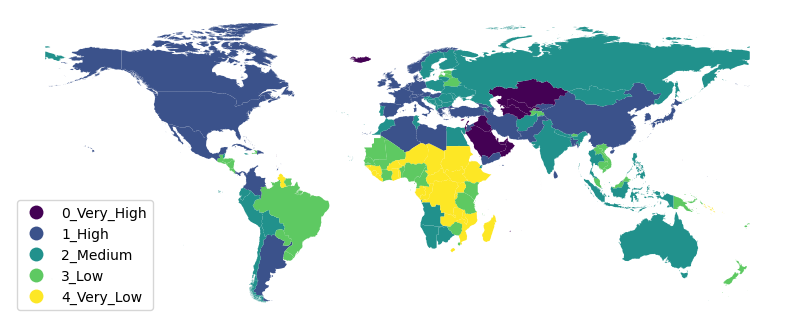

In [83]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='ForestRev_gdp_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

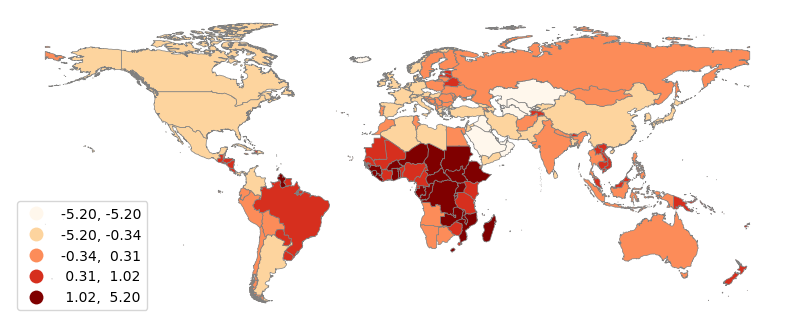

In [84]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='ForestRev_gdp_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [85]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

In [86]:
import pandas as pd

electricity=pd.read_csv(os.path.join("data","electricity.csv"))

electricity.head()

,country,ISO 3 country code,electricity production from oil sources
0,India,IND,1.659504
1,China,CHN,0.165618
2,United States,USA,0.903807
3,Indonesia,IDN,8.398010
4,Pakistan,PAK,37.224993


In [89]:
# Eliminamos las columnas que no necesitamos
electricity.rename(columns={ electricity.columns[1]: "ISO3" }, inplace = True)
electricity.rename(columns={ electricity.columns[2]: "electricity" }, inplace = True)

In [94]:
d2 = pd.merge(theMapAndData, electricity, left_on='iso3', right_on='ISO3', how='inner')

In [95]:
DataNames=['electricity']

In [96]:
pd.melt(d2[DataNames])

,variable,value
0,electricity,NaN
1,electricity,NaN
2,electricity,1.319806
3,electricity,6.509235
4,electricity,0.000000
...,...,...
164,electricity,3.006176
165,electricity,0.494387
166,electricity,99.393939
167,electricity,8.398010


In [97]:
d2.dropna(subset=['electricity'], inplace=True)

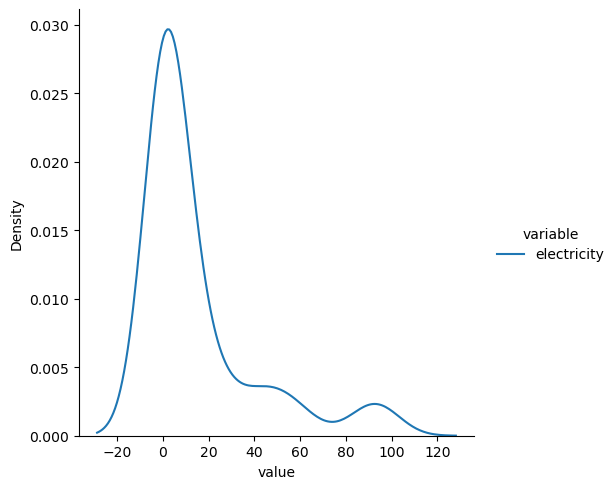

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(d2[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

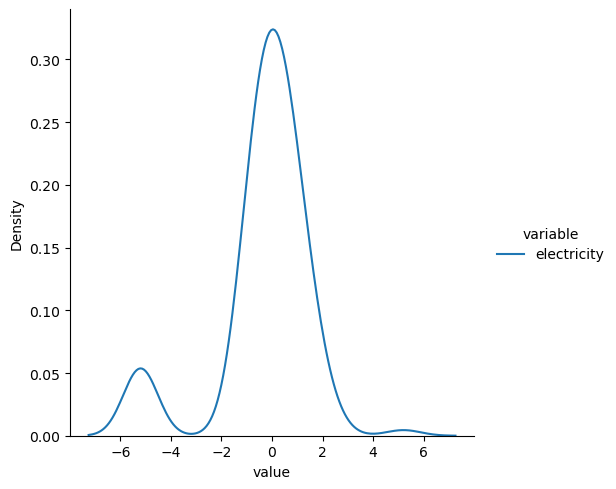

In [100]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(d2[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [102]:
d2['electricity_Qt']=QtScaled_data[:,0]

In [104]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=d2.electricity_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [105]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

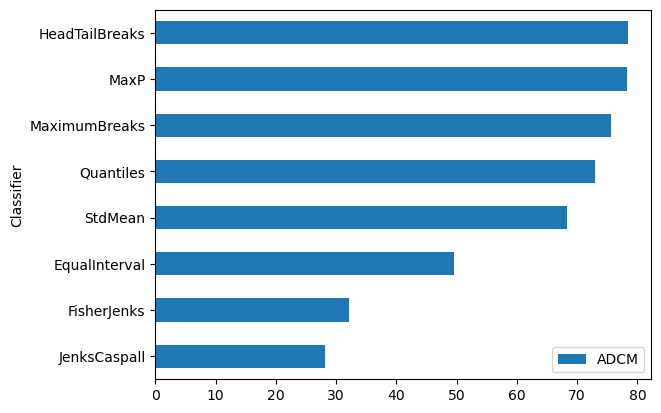

In [106]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [107]:
d2['electricity_Qt_jc5'] = jc5.yb

In [108]:
# there you are
d2[['electricity_Qt','electricity_Qt_jc5']].head()

,electricity_Qt,electricity_Qt_jc5
2,-0.095562,2
3,0.374528,3
4,-5.199338,0
5,-5.199338,0
6,1.173192,4


In [109]:
indexList=['electricity_Qt_jc5'] # add more?
aggregator={'electricity_Qt': ['mean']}

pd.concat([d2[['electricity_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,electricity_Qt_jc5,electricity_Qt
,,mean
0,0,-5.199338
1,1,-0.823044
2,2,-0.069779
3,3,0.608918
4,4,1.663136


In [111]:
# renaming
newLabelsForLevels={0:"0_Very_High", 1:"1_High", 2:"2_Medium", 3:"3_Low", 4:"4_Very_Low"}

d2['electricity_Qt_jc5_cat']=d2.loc[:,'electricity_Qt_jc5'].replace(newLabelsForLevels)

# we have
d2[['electricity_Qt','electricity_Qt_jc5','electricity_Qt_jc5_cat']].head(20)

,electricity_Qt,electricity_Qt_jc5,electricity_Qt_jc5_cat
2,-0.095562,2,2_Medium
3,0.374528,3,3_Low
4,-5.199338,0,0_Very_High
5,-5.199338,0,0_Very_High
6,1.173192,4,4_Very_Low
8,0.632391,3,3_Low
9,0.136241,2,2_Medium
10,-0.056057,2,2_Medium
11,-1.117121,1,1_High
13,0.186060,2,2_Medium


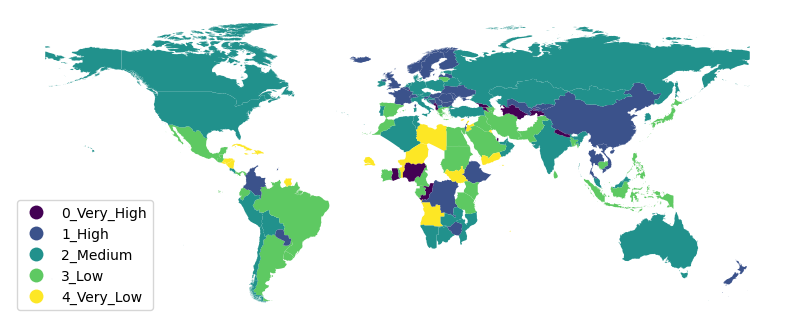

In [113]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
d2.plot(column='electricity_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

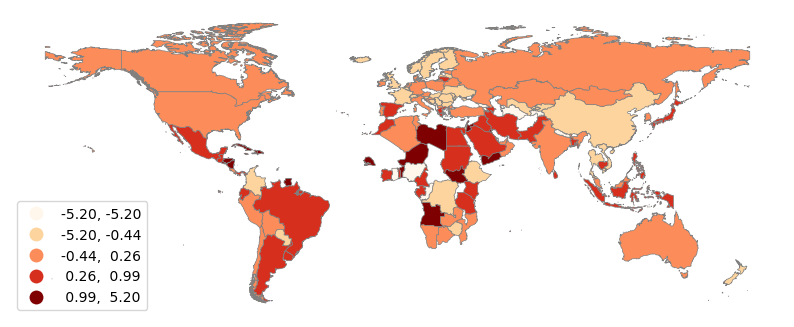

In [114]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
d2.plot(column='electricity_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [119]:
d2 = d2.drop(d2.columns[[16,17]], axis=1)

In [121]:
# finally

d2.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")